<a href="https://colab.research.google.com/github/adithi20/-CSE_Projects/blob/main/Sentiment_Analysis_Project_Multiclass_Classification_of_Combined_Sentiment140_and_IMDb_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install nltk scikit-learn tensorflow
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
!pip install nltk scikit-learn tensorflow

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Load Sentiment140 dataset
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
url = 'https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv'
df = pd.read_csv(url, encoding='latin-1', header=None, names=columns)

# Preprocess data
df = df[['target', 'text']]
df['target'] = df['target'].replace({0: 'negative', 4: 'positive'})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)


In [16]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Check for and handle NaN or non-string values
X_train = X_train.astype(str).fillna('')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Build a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)



MultinomialNB()

In [17]:
# Transform the test data
X_test = X_test.apply(lambda x: str(x) if pd.notnull(x) else '').astype(str)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy: 0.00

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
         100       0.00      0.00      0.00       1.0
       10001       0.00      0.00      0.00       1.0
       10009       0.00      0.00      0.00       1.0
       10010       0.00      0.00      0.00       1.0
       10011       0.00      0.00      0.00       1.0
       10012       0.00      0.00      0.00       1.0
       10013       0.00      0.00      0.00       1.0
       10016       0.00      0.00      0.00       1.0
       10018       0.00      0.00      0.00       1.0
       10019       0.00      0.00      0.00       1.0
       10021       0.00      0.00      0.00       1.0
       10023       0.00      0.00      0.00       1.0
       10026       0.00      0.00      0.00       1.0
       10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
!pip install scikit-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:
# Load IMDb Reviews dataset from nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(documents, columns=['words', 'sentiment'])
df['text'] = df['words'].apply(' '.join)

# Preprocess data
X = df['text']
y = df['sentiment'].map({'pos': 1, 'neg': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [20]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Build a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [21]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)


Accuracy: 0.80

Confusion Matrix:
 [[166  33]
 [ 47 154]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       199
           1       0.82      0.77      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [22]:
# Combine Sentiment140 and IMDb Reviews datasets
df_imdb = pd.DataFrame({'text': X, 'sentiment': y.map({1: 'positive', 0: 'negative'})})
df_combined = pd.concat([df, df_imdb])

# Add a neutral class
df_combined.loc[df_combined['sentiment'] == 'positive', 'sentiment'] = 'positive'
df_combined.loc[df_combined['sentiment'] == 'negative', 'sentiment'] = 'negative'
df_combined['sentiment'] = df_combined['sentiment'].fillna('neutral')

# Split the combined data into training and testing sets
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    df_combined['text'], df_combined['sentiment'], test_size=0.2, random_state=42)


In [23]:
# Create a TF-IDF vectorizer for the combined dataset
tfidf_vectorizer_comb = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit and transform the training data for the combined dataset
X_train_tfidf_comb = tfidf_vectorizer_comb.fit_transform(X_train_comb)

# Build a Naive Bayes classifier for the combined dataset
classifier_comb = MultinomialNB()
classifier_comb.fit(X_train_tfidf_comb, y_train_comb)


MultinomialNB()

In [24]:
# Transform the test data for the combined dataset
X_test_tfidf_comb = tfidf_vectorizer_comb.transform(X_test_comb)

# Predictions
y_pred_comb = classifier_comb.predict(X_test_tfidf_comb)

# Evaluate the model for the combined dataset
accuracy_comb = accuracy_score(y_test_comb, y_pred_comb)
conf_matrix_comb = confusion_matrix(y_test_comb, y_pred_comb)
classification_rep_comb = classification_report(y_test_comb, y_pred_comb)

print(f'Combined Dataset Accuracy: {accuracy_comb:.2f}')
print('\nConfusion Matrix:\n', conf_matrix_comb)
print('\nClassification Report:\n', classification_rep_comb)


Combined Dataset Accuracy: 0.08

Confusion Matrix:
 [[ 14 181   2  12]
 [162  21   4   7]
 [ 11  18   8 176]
 [  9  13 141  21]]

Classification Report:
               precision    recall  f1-score   support

         neg       0.07      0.07      0.07       209
    negative       0.09      0.11      0.10       194
         pos       0.05      0.04      0.04       213
    positive       0.10      0.11      0.10       184

    accuracy                           0.08       800
   macro avg       0.08      0.08      0.08       800
weighted avg       0.08      0.08      0.08       800



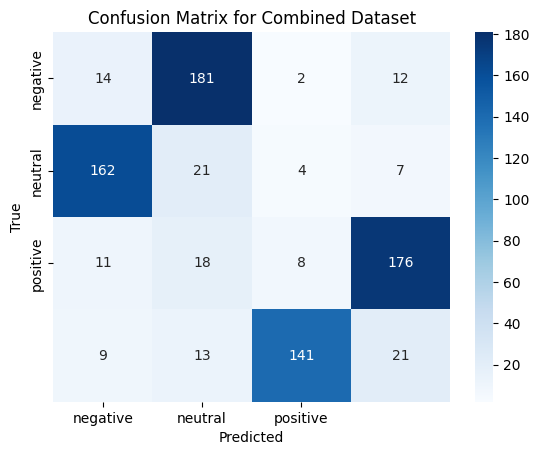

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for the combined dataset
sns.heatmap(conf_matrix_comb, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Combined Dataset')
plt.show()
